In [9]:
import os 
import numpy as np 
import pandas as pd 
import pickle 
import quandl 
from datetime import datetime
import seaborn

%matplotlib inline

In [10]:
import plotly.offline as py 
import plotly.graph_objs as go 
import plotly.figure_factory as ff 
py.init_notebook_mode(connected=True)

In [11]:
def get_quandl_data(quandl_id):     
    '''Download and cache Quandl dataseries'''     
    cache_path = '{}.pkl'.format(quandl_id).replace('/','-')     
    try:         
        f = open(cache_path, 'rb')         
        df = pickle.load(f) 
        print('Loaded {} from cache'.format(quandl_id))     
    except (OSError, IOError) as e:         
        print('Downloading {} from Quandl'.format(quandl_id))         
        df = quandl.get(quandl_id, returns="pandas")         
        df.to_pickle(cache_path)         
        print('Cached {} at {}'.format(quandl_id, cache_path))     
    return df

In [12]:
btc_usd_price_kraken = get_quandl_data('BCHARTS/KRAKENUSD')

Loaded BCHARTS/KRAKENUSD from cache


In [13]:
btc_trace = go.Scatter(x=btc_usd_price_kraken.index, y=btc_usd_price_kraken['Weighted Price']) 

In [14]:
py.iplot([btc_trace])

In [15]:
# Pull pricing data for 3 more BTC exchanges 
exchanges=['COINBASE','BITSTAMP','ITBIT']
exchange_data={}
exchange_data['KRAKEN']=btc_usd_price_kraken 
for exchange in exchanges:
    exchange_code='BCHARTS/{}USD'.format(exchange)
    btc_exchange_df=get_quandl_data(exchange_code)
    exchange_data[exchange]=btc_exchange_df

Loaded BCHARTS/COINBASEUSD from cache
Loaded BCHARTS/BITSTAMPUSD from cache
Loaded BCHARTS/ITBITUSD from cache


In [16]:
def merge_dfs_on_column(dataframes, labels, col):
    '''Merge a single column of each dataframe into a new combined dataframe'''
    series_dict={} 
    for index in range(len(dataframes)):
        series_dict[labels[index]]=dataframes[index][col]
    return pd.DataFrame(series_dict)

In [17]:
# Merge the BTC price dataseries' into a single dataframe
btc_usd_datasets=merge_dfs_on_column(list(exchange_data.values()), list(exchange_data.keys()),'Weighted Price')

In [18]:
btc_usd_datasets

,BITSTAMP,COINBASE,ITBIT,KRAKEN
Date,,,,
2011-09-13,5.929231,NaN,NaN,NaN
2011-09-14,5.590798,NaN,NaN,NaN
2011-09-15,5.094272,NaN,NaN,NaN
2011-09-16,4.854515,NaN,NaN,NaN
2011-09-17,4.870000,NaN,NaN,NaN
2011-09-18,4.839576,NaN,NaN,NaN
2011-09-19,4.900000,NaN,NaN,NaN
2011-09-20,5.388054,NaN,NaN,NaN
2011-09-21,5.706075,NaN,NaN,NaN


从逻辑上来说，下一步就是通过可视化，将这些数据进行比对。为此，我们需要先定义一个辅助函数，通过提供单行命令使用数据制作图表。

In [19]:
# Still need to figure this step out:
def df_scatter(df, title,seperate_y_axis=True, y_axis_label='', scale='linear',initial_hide=False):
    '''Generate a scatter plot of the entire dataframe'''
    label_arr= list(df)
    series_arr= list(map(lambda col:df[col],label_arr))          
    layout =go.Layout(title=title, legend=dict(orientation="h"), xaxis=dict(type='date'), yaxis=dict(title=y_axis_label, showticklabels=not seperate_y_axis, type=scale))
    y_axis_config=dict(overlaying='y', showticklabels=False,  type=scale )         
    visibility ='visible'
    if initial_hide: 
        visibility ='legendonly'
        # Form Trace For Each Series
        trace_arr=[]
        for index, series in enumerate(series_arr):         
            trace =go.Scatter(x=series.index, y=series, name=label_arr[index], visible=visibility)
            # Add seperate axis for the series
        if seperate_y_axis: 
            trace['yaxis']='y{}'.format(index +1)             
            layout['yaxis{}'.format(index +1)]=y_axis_config
            trace_arr.append(trace)      
            fig =go.Figure(data=trace_arr, layout=layout)
            py.iplot(fig)
            

# Plot all of the BTC exchange prices
df_scatter(btc_usd_datasets,'Bitcoin Price (USD) By Exchange')

In [24]:
def df_scatter(df, title, seperate_y_axis=True, y_axis_label='', scale='linear',initial_hide=False):
    '''Generate a scatter plot of the entire dataframe'''
    label_arr= list(df)
    series_arr= list(map(lambda col:df[col],label_arr))          
    layout =go.Layout(title=title, legend=dict(orientation="h"), xaxis=dict(type='date'), yaxis=dict(title=y_axis_label, showticklabels= seperate_y_axis, type=scale))
    y_axis_config=dict(overlaying='y', showticklabels=False,  type=scale )          
    visibility ='visible'
    if initial_hide: 
        visibility ='legendonly'
        
    # Form Trace For Each series
#     print (series_arr)
    trace_arr=[]
    for index, series in enumerate(series_arr):         
        trace =go.Scatter(x=series.index, y=series, name=label_arr[index], visible=visibility)
        # Add seperate axis for the series
    if seperate_y_axis: 
        trace['yaxis']='y{}'.format(index +1)             
        layout['yaxis{}'.format(index +1)]= y_axis_config
        trace_arr.append(trace)      
        fig =go.Figure(data=trace_arr, layout=layout)
        py.iplot(fig)
        
# Plot all of the BTC exchange prices
df_scatter(btc_usd_datasets,'Bitcoin Price (USD) By Exchange')

为简便起见，我不会过多探讨这个辅助函数的工作原理。如果想了解更多，请查看Pandas 和 Plotly的说明文件。

现在，我们就可以轻松制作比特币价格数据的图形了！

步骤2.6 清理并加总价格数据

In [25]:
# Plot the revised dataframe
df_scatter(btc_usd_datasets,'Bitcoin Price (USD) By Exchange')

我们现在可以计算一个新的列：所有交易所的比特币日平均价格。

In [26]:
btc_usd_datasets.replace(0,np.nan,inplace=True)

In [27]:
# Calculate the average BTC price as a new column
btc_usd_datasets['avg_btc_price_usd']=btc_usd_datasets.mean(axis=1)

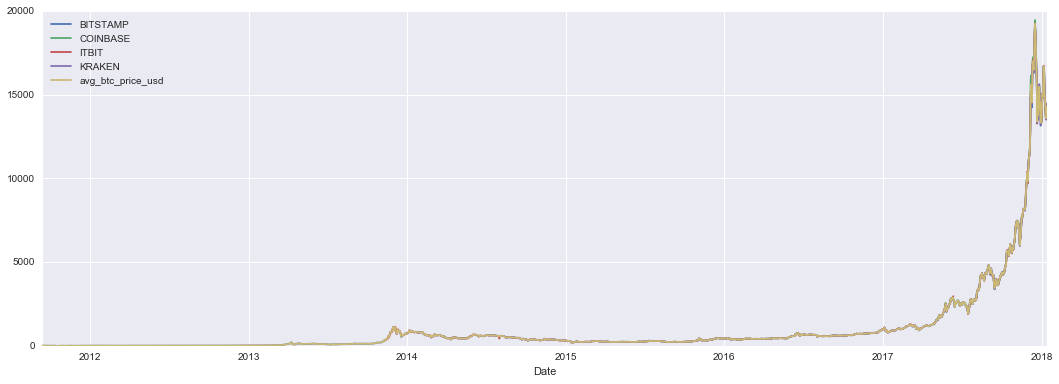

In [28]:
btc_usd_datasets.plot(figsize=(18, 6))

新的一列就是比特币的价格指数！我们再把它画出来，以核对该数据看起来是否有问题。

In [29]:
# Plot the average BTC price
btc_trace=go.Scatter(x=btc_usd_datasets.index, y=btc_usd_datasets['avg_btc_price_usd'])
py.iplot([btc_trace])

步骤3 获取山寨币（Altcoins）价格

In [30]:
def get_json_data(json_url,cache_path):
    '''Download and cache JSON data, return as a dataframe.'''
    try:                 
        f = open(cache_path,'rb')
        df=pickle.load(f)
        print('Loaded {} from cache'.format(json_url))
    except(OSError,IOError) as e:
        print('Downloading {}'.format(json_url))
    df=pd.read_json(json_url)
    df.to_pickle(cache_path)
    print('Cached {} at {}'.format(json_url,cache_path))
    return df

base_polo_url='https://poloniex.com/public?command=returnChartData&currencyPair={}&start={}&end={}&period={}'
start_date=datetime.strptime('2015-01-01','%Y-%m-%d')
# get data from the start of 2015
end_date=datetime.now()
# up until today
pediod=86400
# pull daily data (86,400 seconds per day)

In [31]:
def get_crypto_data(poloniex_pair):
    '''Retrieve cryptocurrency data from poloniex'''
    json_url=base_polo_url.format(poloniex_pair,start_date.timestamp(),end_date.timestamp(),pediod)
    data_df=get_json_data(json_url,poloniex_pair)
    data_df=data_df.set_index('date')
    return data_df

altcoins=['ETH','LTC','XRP','ETC','STR','DASH','SC','XMR','XEM']
altcoin_data={} 
for altcoin in altcoins:
    coinpair='BTC_{}'.format(altcoin)
    crypto_price_df=get_crypto_data(coinpair)
    altcoin_data[altcoin]=crypto_price_df

altcoin_data['ETH'].tail() 

Loaded https://poloniex.com/public?command=returnChartData&currencyPair=BTC_ETH&start=1420088400.0&end=1517186393.209752&period=86400 from cache
Cached https://poloniex.com/public?command=returnChartData&currencyPair=BTC_ETH&start=1420088400.0&end=1517186393.209752&period=86400 at BTC_ETH
Loaded https://poloniex.com/public?command=returnChartData&currencyPair=BTC_LTC&start=1420088400.0&end=1517186393.209752&period=86400 from cache
Cached https://poloniex.com/public?command=returnChartData&currencyPair=BTC_LTC&start=1420088400.0&end=1517186393.209752&period=86400 at BTC_LTC
Loaded https://poloniex.com/public?command=returnChartData&currencyPair=BTC_XRP&start=1420088400.0&end=1517186393.209752&period=86400 from cache
Cached https://poloniex.com/public?command=returnChartData&currencyPair=BTC_XRP&start=1420088400.0&end=1517186393.209752&period=86400 at BTC_XRP
Loaded https://poloniex.com/public?command=returnChartData&currencyPair=BTC_ETC&start=1420088400.0&end=1517186393.209752&period=86

,close,high,low,open,quoteVolume,volume,weightedAverage
date,,,,,,,
2018-01-25,0.093880,0.095200,0.09250,0.093441,37319.146733,3510.753422,0.094074
2018-01-26,0.094644,0.097118,0.09225,0.094196,53754.731823,5081.910173,0.094539
2018-01-27,0.097400,0.098000,0.09397,0.094619,31242.774805,2992.963399,0.095797
2018-01-28,0.105169,0.105407,0.09683,0.097400,44519.565384,4555.854929,0.102334
2018-01-29,0.105041,0.105400,0.10500,0.105290,927.839051,97.615426,0.105207


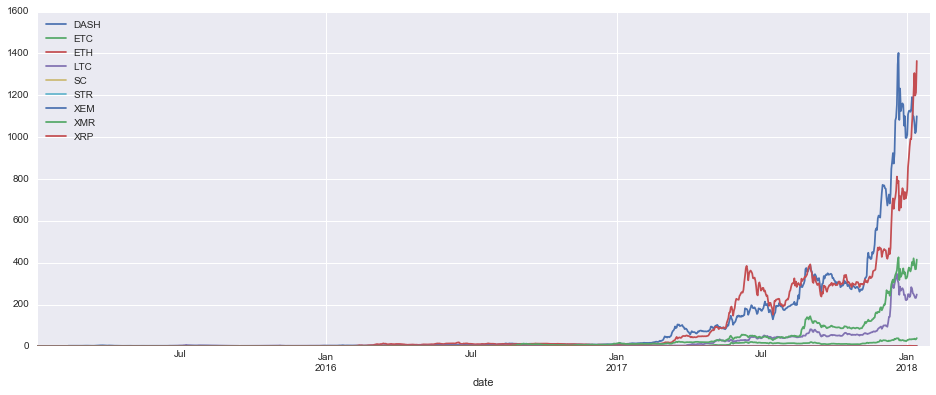

In [32]:
# Calculate USD Price as a new column in each altcoin dataframe 
for altcoin in altcoin_data.keys():     
    altcoin_data[altcoin]['price_usd'] =  altcoin_data[altcoin]['weightedAverage'] * btc_usd_datasets['avg_btc_price_usd']
    
# Merge USD price of each altcoin into single dataframe  
combined_df = merge_dfs_on_column(list(altcoin_data.values()), list(altcoin_data.keys()), 'price_usd')

# Chart all of the altocoin prices 
#df_scatter(combined_df, 'Cryptocurrency Prices (USD)', seperate_y_axis=False, y_axis_label='Coin Value (USD)', scale='log')
combined_df.plot(figsize=(16, 6))

In [33]:
combined_df.head()

,DASH,ETC,ETH,LTC,SC,STR,XEM,XMR,XRP
date,,,,,,,,,
2015-01-02,1.974292,NaN,NaN,2.685418,NaN,0.005536,NaN,0.455994,0.024511
2015-01-03,1.818238,NaN,NaN,2.389670,NaN,0.005117,NaN,0.473959,0.022297
2015-01-04,1.705425,NaN,NaN,2.079496,NaN,0.004521,NaN,0.424769,0.018999
2015-01-05,1.650610,NaN,NaN,2.076988,NaN,0.004870,NaN,0.413943,0.020051
2015-01-06,1.667679,NaN,NaN,2.091707,NaN,0.004928,NaN,0.440428,0.020350


In [34]:
combined_df.index

DatetimeIndex(['2015-01-02', '2015-01-03', '2015-01-04', '2015-01-05',
               '2015-01-06', '2015-01-07', '2015-01-08', '2015-01-09',
               '2015-01-10', '2015-01-11',
               ...
               '2018-01-20', '2018-01-21', '2018-01-22', '2018-01-23',
               '2018-01-24', '2018-01-25', '2018-01-26', '2018-01-27',
               '2018-01-28', '2018-01-29'],
              dtype='datetime64[ns]', name='date', length=1124, freq='D')

In [35]:
combined_df

,DASH,ETC,ETH,LTC,SC,STR,XEM,XMR,XRP
date,,,,,,,,,
2015-01-02,1.974292,NaN,NaN,2.685418,NaN,0.005536,NaN,0.455994,0.024511
2015-01-03,1.818238,NaN,NaN,2.389670,NaN,0.005117,NaN,0.473959,0.022297
2015-01-04,1.705425,NaN,NaN,2.079496,NaN,0.004521,NaN,0.424769,0.018999
2015-01-05,1.650610,NaN,NaN,2.076988,NaN,0.004870,NaN,0.413943,0.020051
2015-01-06,1.667679,NaN,NaN,2.091707,NaN,0.004928,NaN,0.440428,0.020350
2015-01-07,1.742234,NaN,NaN,2.183424,NaN,0.005164,NaN,0.462845,0.020957
2015-01-08,1.730026,NaN,NaN,2.099834,NaN,0.005563,NaN,0.447558,0.020871
2015-01-09,1.747407,NaN,NaN,2.051141,NaN,0.005792,NaN,0.428848,0.021352
2015-01-10,1.711341,NaN,NaN,1.801965,NaN,0.005455,NaN,0.403604,0.020094


,DASH,ETC,ETH,LTC,SC,STR,XEM,XMR,XRP
date,,,,,,,,,
2015-01-02,1.974292,NaN,NaN,2.685418,NaN,0.005536,NaN,0.455994,0.024511
2015-01-03,1.818238,NaN,NaN,2.389670,NaN,0.005117,NaN,0.473959,0.022297
2015-01-04,1.705425,NaN,NaN,2.079496,NaN,0.004521,NaN,0.424769,0.018999
2015-01-05,1.650610,NaN,NaN,2.076988,NaN,0.004870,NaN,0.413943,0.020051
2015-01-06,1.667679,NaN,NaN,2.091707,NaN,0.004928,NaN,0.440428,0.020350
2015-01-07,1.742234,NaN,NaN,2.183424,NaN,0.005164,NaN,0.462845,0.020957
2015-01-08,1.730026,NaN,NaN,2.099834,NaN,0.005563,NaN,0.447558,0.020871
2015-01-09,1.747407,NaN,NaN,2.051141,NaN,0.005792,NaN,0.428848,0.021352
2015-01-10,1.711341,NaN,NaN,1.801965,NaN,0.005455,NaN,0.403604,0.020094


In [36]:
# Calculate the pearson correlation coefficients for cryptocurrencies in 2016 
combined_df_2018 = combined_df[combined_df.index.year == 2018] 
combined_df_2018.pct_change().corr(method='pearson')
def correlation_heatmap(df, title, absolute_bounds=True):     
    '''Plot a correlation heatmap for the entire dataframe'''     
    heatmap = go.Heatmap(         
        z=df.corr(method='pearson').as_matrix(), x=df.columns,         
        y=df.columns, colorbar=dict(title='Pearson Coefficient'), )          
    layout = go.Layout(title=title)         
    if absolute_bounds: 
        heatmap['zmax'] = 1.0         
        heatmap['zmin'] = -1.0              
        fig = go.Figure(data=[heatmap], layout=layout)     
        py.iplot(fig) 
correlation_heatmap(combined_df_2018.pct_change(), "Cryptocurrency Correlations in 2018")

In [37]:
# Calculate the pearson correlation coefficients for cryptocurrencies in 2016 
combined_df_2017 = combined_df[combined_df.index.year == 2017] 
combined_df_2017.pct_change().corr(method='pearson')
def correlation_heatmap(df, title, absolute_bounds=True):     
    '''Plot a correlation heatmap for the entire dataframe'''     
    heatmap = go.Heatmap(         
        z=df.corr(method='pearson').as_matrix(), x=df.columns,         
        y=df.columns, colorbar=dict(title='Pearson Coefficient'), )          
    layout = go.Layout(title=title)         
    if absolute_bounds: 
        heatmap['zmax'] = 1.0         
        heatmap['zmin'] = -1.0              
        fig = go.Figure(data=[heatmap], layout=layout)     
        py.iplot(fig) 
correlation_heatmap(combined_df_2017.pct_change(), "Cryptocurrency Correlations in 2017")

In [38]:
# Calculate the pearson correlation coefficients for cryptocurrencies in 2016 
combined_df_2016 = combined_df[combined_df.index.year == 2016] 
combined_df_2016.pct_change().corr(method='pearson')
def correlation_heatmap(df, title, absolute_bounds=True):     
    '''Plot a correlation heatmap for the entire dataframe'''     
    heatmap = go.Heatmap(         
        z=df.corr(method='pearson').as_matrix(), x=df.columns,         
        y=df.columns, colorbar=dict(title='Pearson Coefficient'), )          
    layout = go.Layout(title=title)         
    if absolute_bounds: 
        heatmap['zmax'] = 1.0         
        heatmap['zmin'] = -1.0              
        fig = go.Figure(data=[heatmap], layout=layout)     
        py.iplot(fig) 
correlation_heatmap(combined_df_2016.pct_change(), "Cryptocurrency Correlations in 2016")

In [39]:
# Calculate the pearson correlation coefficients for cryptocurrencies in 2016 
combined_df_2015 = combined_df[combined_df.index.year == 2015] 
combined_df_2015.pct_change().corr(method='pearson')
def correlation_heatmap(df, title, absolute_bounds=True):     
    '''Plot a correlation heatmap for the entire dataframe'''     
    heatmap = go.Heatmap(         
        z=df.corr(method='pearson').as_matrix(), x=df.columns,         
        y=df.columns, colorbar=dict(title='Pearson Coefficient'), )          
    layout = go.Layout(title=title)         
    if absolute_bounds: 
        heatmap['zmax'] = 1.0         
        heatmap['zmin'] = -1.0              
        fig = go.Figure(data=[heatmap], layout=layout)     
        py.iplot(fig) 
correlation_heatmap(combined_df_2015.pct_change(), "Cryptocurrency Correlations in 2015")

## Pairs trading between STR XRP

In [40]:
str_sr = combined_df['STR']
xrp_sr = combined_df['XRP']

In [41]:
xrp_sr

date
2015-01-02    0.024511
2015-01-03    0.022297
2015-01-04    0.018999
2015-01-05    0.020051
2015-01-06    0.020350
2015-01-07    0.020957
2015-01-08    0.020871
2015-01-09    0.021352
2015-01-10    0.020094
2015-01-11    0.018608
2015-01-12    0.018904
2015-01-13    0.015464
2015-01-14    0.014417
2015-01-15    0.016697
2015-01-16    0.016485
2015-01-17    0.015444
2015-01-18    0.015652
2015-01-19    0.015883
2015-01-20    0.016368
2015-01-21    0.016765
2015-01-22    0.017093
2015-01-23    0.016667
2015-01-24    0.016713
2015-01-25    0.016525
2015-01-26    0.016269
2015-01-27    0.015417
2015-01-28    0.015713
2015-01-29    0.014821
2015-01-30    0.014344
2015-01-31    0.014485
                ...   
2017-12-31    1.878660
2018-01-01    1.950126
2018-01-02    2.071496
2018-01-03    2.565636
2018-01-04    2.958787
2018-01-05    2.640159
2018-01-06    2.657046
2018-01-07    2.702216
2018-01-08    2.405346
2018-01-09    2.211123
2018-01-10    1.899769
2018-01-11    1.904017
2018-0

In [180]:
str_sr.

date
2015-01-02    0.005536
2015-01-03    0.005117
2015-01-04    0.004521
2015-01-05    0.004870
2015-01-06    0.004381
2015-01-07    0.004590
2015-01-08    0.004945
2015-01-09    0.005792
2015-01-10    0.005455
2015-01-11    0.005094
2015-01-12    0.005038
2015-01-13    0.004310
2015-01-14    0.004223
2015-01-15    0.005000
2015-01-16    0.004664
2015-01-17    0.004560
2015-01-18    0.004878
2015-01-19    0.005049
2015-01-20    0.004852
2015-01-21    0.004996
2015-01-22    0.005112
2015-01-23    0.004829
2015-01-24    0.004956
2015-01-25    0.004830
2015-01-26    0.004702
2015-01-27    0.004266
2015-01-28    0.004328
2015-01-29    0.004146
2015-01-30    0.004250
2015-01-31    0.004121
                ...   
2017-12-16    0.206224
2017-12-17    0.264126
2017-12-18    0.265881
2017-12-19    0.272750
2017-12-20    0.235122
2017-12-21    0.251667
2017-12-22    0.213321
2017-12-23    0.237368
2017-12-24    0.216302
2017-12-25    0.223701
2017-12-26    0.219886
2017-12-27    0.221311
2017-1

In [178]:
btc_usd_datasets

,BITSTAMP,COINBASE,ITBIT,KRAKEN,avg_btc_price_usd
Date,,,,,
2011-09-13,5.929231,NaN,NaN,NaN,5.929231
2011-09-14,5.590798,NaN,NaN,NaN,5.590798
2011-09-15,5.094272,NaN,NaN,NaN,5.094272
2011-09-16,4.854515,NaN,NaN,NaN,4.854515
2011-09-17,4.870000,NaN,NaN,NaN,4.870000
2011-09-18,4.839576,NaN,NaN,NaN,4.839576
2011-09-19,4.900000,NaN,NaN,NaN,4.900000
2011-09-20,5.388054,NaN,NaN,NaN,5.388054
2011-09-21,5.706075,NaN,NaN,NaN,5.706075


## Autopsy

In [75]:
df = btc_usd_datasets
title = 'Bitcoin Price (USD) By Exchange'

In [79]:
# label_arr= list(df)
# series_arr= list(map(lambda col:df[col],label_arr))          
layout =go.Layout(title=title, legend=dict(orientation="h"), xaxis=dict(type='date'), yaxis=dict(title=y_axis_label, showticklabels= not seperate_y_axis, type=scale))
# y_axis_config=dict(overlaying='y', showticklabels=False,  type=scale )          
# visibility ='visible'
# if initial_hide: 
#     visibility ='legendonly'


# Seriestrace_arr=[]
# for index, series in enumerate(series_arr):         
#     trace =go.Scatter(x=series.index, y=series, name=label_arr[index], visible=visibility)

# if seperate_y_axis: 
#     trace['yaxis']='y{}'.format(index +1)             
#     layout['yaxis{}'.format(index +1)]=y_axis_configtrace_arr.append(trace)      
#     fig =go.Figure(data=trace_arr, layout=layout)
#     py.iplot(fig)

NameError: name 'y_axis_label' is not defined

In [78]:
series_arr

[Date
 2011-09-13        5.929231
 2011-09-14        5.590798
 2011-09-15        5.094272
 2011-09-16        4.854515
 2011-09-17        4.870000
 2011-09-18        4.839576
 2011-09-19        4.900000
 2011-09-20        5.388054
 2011-09-21        5.706075
 2011-09-22        5.696960
 2011-09-23        5.707099
 2011-09-24        5.722494
 2011-09-25        6.050000
 2011-09-26        5.983073
 2011-09-27        4.895402
 2011-09-28        4.862498
 2011-09-29        4.816345
 2011-09-30        0.000000
 2011-10-01        0.000000
 2011-10-02        0.000000
 2011-10-03        4.847772
 2011-10-04        4.924737
 2011-10-05        5.029419
 2011-10-06        4.908846
 2011-10-07        4.687629
 2011-10-08        4.455536
 2011-10-09        3.890000
 2011-10-10        4.498302
 2011-10-11        3.998965
 2011-10-12        3.943964
                   ...     
 2017-12-15    17334.997705
 2017-12-16    18430.689989
 2017-12-17    19110.244062
 2017-12-18    18634.418590
 2017-12-19   